In [16]:
import pandas as pd
colnames = ['Class','Alcohol','Malic']
wine_data = pd.read_csv("wine.csv", usecols=[0,1,2], names = colnames)

In [17]:
wine_data.head()

,Class,Alcohol,Malic
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [18]:
wine_data['Alcohol'].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: Alcohol, dtype: float64

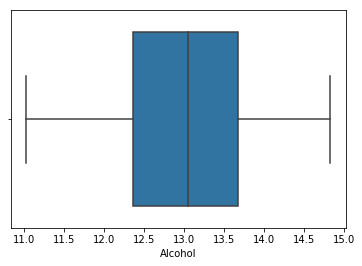

In [19]:
import seaborn as sns
sns.boxplot(x='Alcohol', data=wine_data)

In [20]:
print 'NORMALIZATION'
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler().fit(wine_data[['Alcohol','Malic']])
df_minmax = minmax_scale.transform(wine_data[['Alcohol','Malic']])

NORMALIZATION


In [21]:
print 'STANDARDIZATION'
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit(wine_data[['Alcohol','Malic']])
df_std = std_scale.transform(wine_data[['Alcohol','Malic']])

STANDARDIZATION


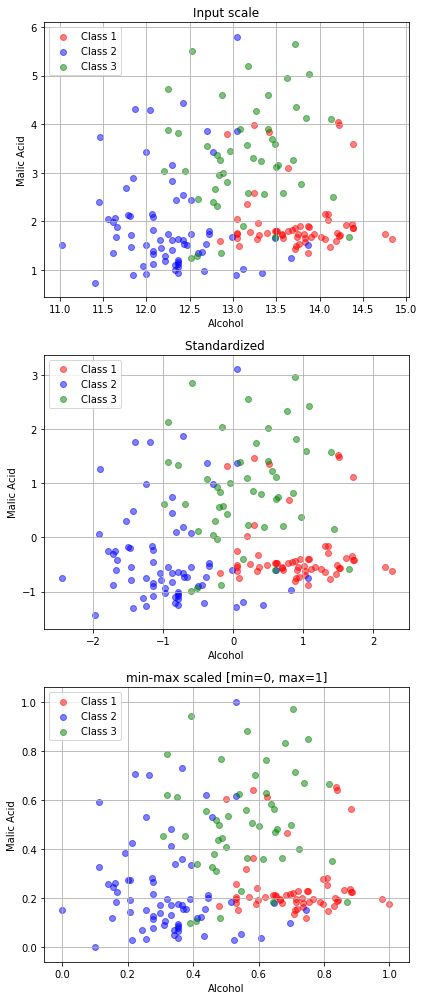

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, figsize=(6,14))
for a,d,l in zip(range(len(ax)),
               (wine_data[['Alcohol', 'Malic']].values, df_std, df_minmax),
               ('Input scale',
                'Standardized ',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[wine_data['Class'].values == i, 0],
                  d[wine_data['Class'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
  
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()
plt.tight_layout()